In [2]:
#basic package
import json
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import shutil
import time
import datetime as dt
import itertools
import time
import re
from collections import Counter
from collections import defaultdict
import operator
import math
import functools
import collections

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_excel(r'D:\vm_exchange\PhD_Data\HealthAssessment\LK\HA_all.xlsx',index_col=False,
                   parse_dates=['date'])#header=0:if there is no header
df['DOA'] = df['date'].map(lambda x: (x-dt.datetime(2019,7,9)).days)
df['WOA'] = df['DOA'].map(lambda x: math.ceil(x/7))
print(df.shape)
df.head(3)

(918, 27)


,date,time,pen,backpack,weight,comb,bare_head,neck,wings,tail,...,r_bumble,r_injure,r_comments,l_podo,l_bumble,l_injure,l_comments,general_notes,DOA,WOA
0,2019-10-28,12:08:00,12,gp,1597.8,0,0,0,0,0,...,0,0,NaN,0,0,0,NaN,NaN,111,16
1,2019-10-28,12:08:00,12,sb,1497.2,0,0,0,0,1,...,0,0,NaN,0,0,2,NaN,NaN,111,16
2,2019-10-28,12:08:00,12,ss,1475.3,0,0,0,0,2,...,0,0,NaN,0,0,0,NaN,NaN,111,16


In [69]:
li_var = ['weight', 'comb','neck', 'wings', 'tail', 'cloaca', 'breast', 'wounds', 
          'r_podo', 'r_bumble','r_injure', 'l_podo', 'l_bumble', 'l_injure']

In [70]:
df['missing_toe'].value_counts()

None    910
Left      8
Name: missing_toe, dtype: int64

In [71]:
df['bare_head'].value_counts()

0    870
1     48
Name: bare_head, dtype: int64

In [72]:
df['date'].value_counts()

2020-03-16    108
2019-10-28    108
2020-01-06    108
2019-12-09    108
2020-05-04    108
2020-02-10    108
2020-06-02    108
2020-06-29     81
2020-06-30     81
Name: date, dtype: int64

In [73]:
df = df[~df['date'].isin(['2020-06-29','2020-06-30'])]

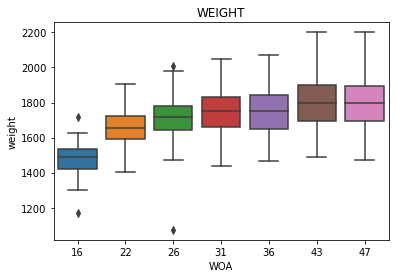

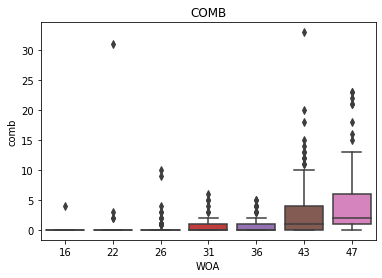

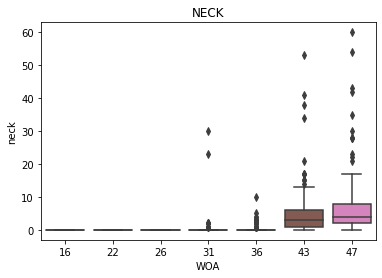

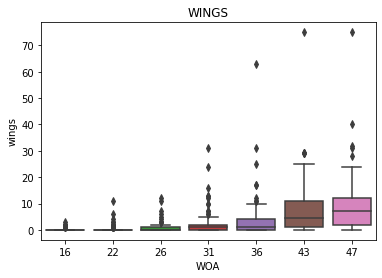

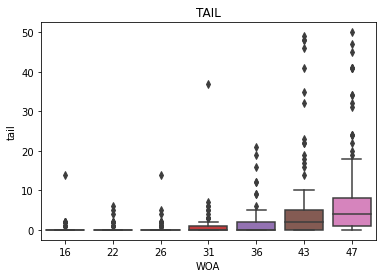

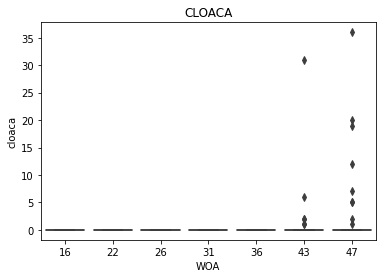

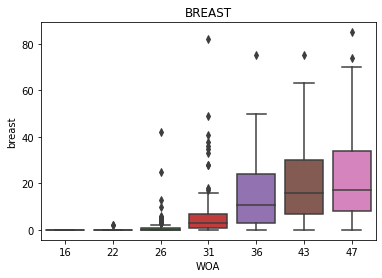

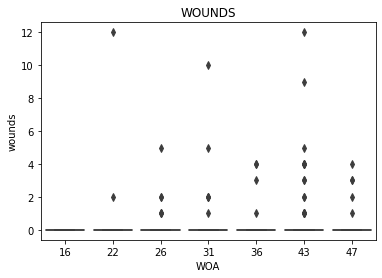

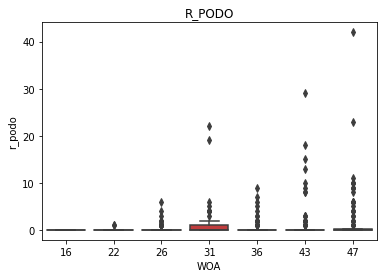

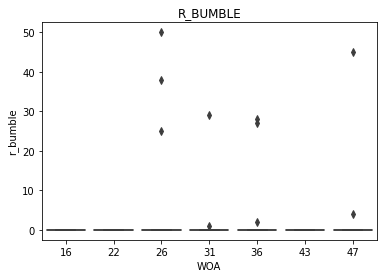

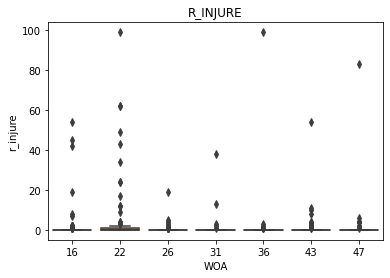

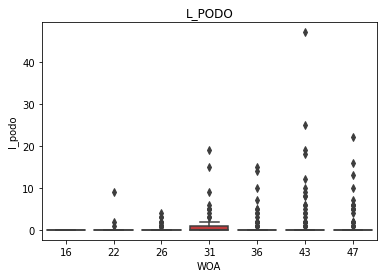

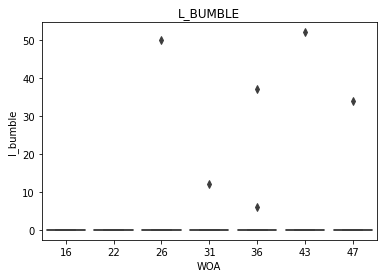

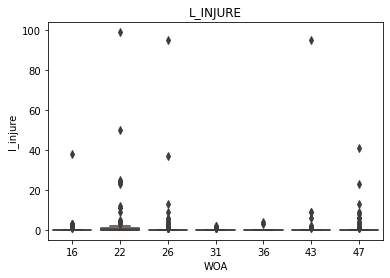

In [77]:
for v in li_var:
    ax = sns.boxplot(x="WOA", y=v, data=df);
    plt.title(v.upper())
    plt.savefig(os.path.join(r'D:\vm_exchange\PhD_Data\HealthAssessment\LK',v+'.png'),dpi=300,format='png',bbox_inches='tight')
    plt.show()